In [1]:

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier


import plotly.graph_objects as go
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, recall_score, precision_score,\
accuracy_score,f1_score,confusion_matrix,plot_confusion_matrix
from imblearn.over_sampling import SMOTE, ADASYN
import plotly.express as px
import warnings
import time
import plotly.express as px

# Predicting Customer Churn

The goal of this project is to predict customer churn for SyriaTel, a telecommunications company. Based on the given categories of data, we want to identify what customers do not stick with SyriaTel's services for much time.

In [2]:
df = pd.read_csv('Data/bigml_59c28831336c6604c800002a.csv')

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#identify some cateogircal variables by Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
#drop phone number, as it is not a useful metric
df = df.drop('phone number', axis = 1)
#change binaries to True/False
df['international plan'] = df['international plan'].map({'yes': True, 'no': False})
df['voice mail plan'] = df['voice mail plan'].map({'yes': True, 'no': False})

In [6]:
#Group Categorical data, get dummies, then merce dataset
categoricals = ['state', 'voice mail plan', 'international plan','churn']
cat = pd.get_dummies(df[categoricals], drop_first = True)
df = df.drop(categoricals, axis = 1)
df = pd.concat([df,cat], axis = 1)
#Identify target and independent Variables
y = df['churn']
X = df.drop('churn', axis = 1)

In [7]:
def model(X,y, test_size=.25):
    
    y = df['churn']
    X = df.drop('churn', axis = 1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    
    models = []

    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('CART', DecisionTreeClassifier(max_depth = 5)))
    models.append(('NB', GaussianNB()))
    models.append(('RFC', RandomForestClassifier(max_depth = 5)))
    models.append(('GBC',GradientBoostingClassifier()))
    models.append(('ABC',AdaBoostClassifier()))
    
    
    results = []
    names = []
    scoring = 'recall'
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
     
    fig = plt.figure(figsize=(10,10))
    fig.suptitle('Model Comparison')
    plt.xlabel('Model Name')
    plt.ylabel('Recall')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

LDA: 0.243812 (0.071764)
CART: 0.664688 (0.046066)
NB: 0.590608 (0.057279)
RFC: 0.145830 (0.054406)
GBC: 0.696249 (0.057698)
ABC: 0.376897 (0.082630)


<ipython-input-7-f9c3418963b9>:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


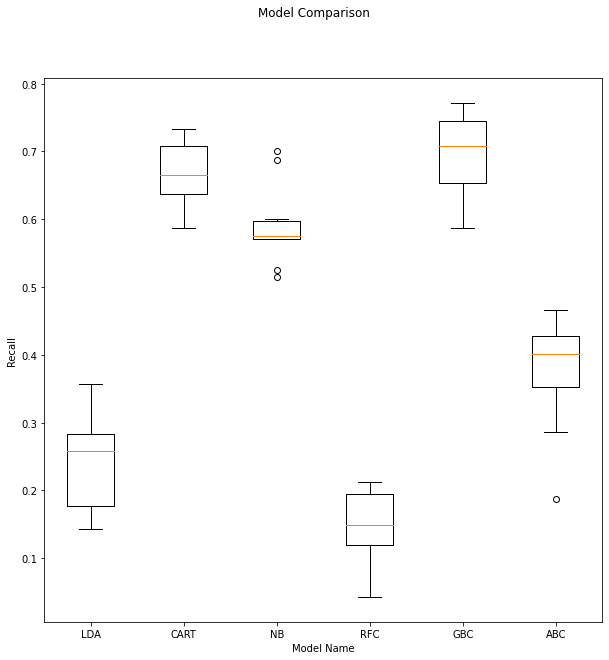

In [8]:
model(X,y, test_size=.25)

Observations: Gradient Boosting Classifier (GBC) was the top performing model. 

In [9]:
y = df['churn']
X = df.drop('churn', axis = 1)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [10]:
GBC_clf = GradientBoostingClassifier(random_state = 42,learning_rate = 0.1)
GBC_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [11]:
# GradientBoosting model predictions
GBC_clf_train_preds = GBC_clf.predict(X_train)
GBC_clf_test_preds = GBC_clf.predict(X_test)

In [12]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("")
display_acc_and_f1_score(y_train, GBC_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, GBC_clf_test_preds, model_name='Gradient Boosted Trees')


Model: Gradient Boosted Trees
Accuracy: 0.9703881552621049
F1-Score: 0.8858024691358025

Testing Metrics
Model: Gradient Boosted Trees
Accuracy: 0.9556354916067147
F1-Score: 0.8384279475982533


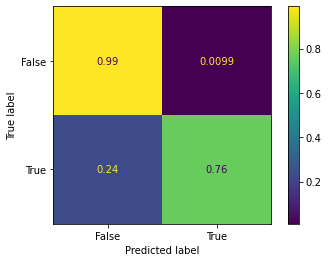

In [13]:
plot_confusion_matrix(GBC_clf, X_test, y_test, normalize = 'true');

In [14]:
GBC_classification_report = classification_report(y_test, GBC_clf_test_preds)
print(GBC_classification_report)

              precision    recall  f1-score   support

       False       0.96      0.99      0.97       708
        True       0.93      0.76      0.84       126

    accuracy                           0.96       834
   macro avg       0.95      0.88      0.91       834
weighted avg       0.95      0.96      0.95       834



In [27]:
GBC_grid = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }
gridsearch = GridSearchCV(GradientBoostingClassifier(), GBC_grid, 
                          scoring = 'recall', refit = True, cv=2, n_jobs = -1)

gridsearch.fit(X_train, y_train)
test_preds = gridsearch.predict(X_test)

In [29]:
df = pd.DataFrame.from_dict(gridsearch.cv_results_)

In [30]:
df.describe()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
count,84672.000000,84672.000000,84672.000000,8.467200e+04,84672.000000,84672.000000,84672.000000,84672.000000,84672.000000
mean,0.032156,0.002629,0.009548,7.523312e-04,0.000013,0.000007,0.000010,0.000009,72.966860
std,0.024303,0.003796,0.002001,1.456929e-03,0.000760,0.000510,0.000483,0.000431,1.261252
min,0.009509,0.000000,0.006005,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.016515,0.000500,0.008508,2.384186e-07,0.000000,0.000000,0.000000,0.000000,73.000000
50%,0.019518,0.001001,0.009008,5.003214e-04,0.000000,0.000000,0.000000,0.000000,73.000000
75%,0.042038,0.003503,0.010009,5.024672e-04,0.000000,0.000000,0.000000,0.000000,73.000000
max,0.211976,0.059554,0.045050,2.852571e-02,0.106145,0.106742,0.055882,0.053371,73.000000


In [31]:
gridsearch.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 10,
 'subsample': 1.0}

In [32]:
gridsearch = GradientBoostingClassifier(**gridsearch.best_params_)

In [33]:
gridsearch.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_features='sqrt',
                           min_samples_leaf=0.1, min_samples_split=0.1,
                           n_estimators=10)

In [34]:
gridsearch.feature_importances_

array([0.        , 0.        , 0.01117692, 0.42051724, 0.01288696,
       0.18108037, 0.01344677, 0.01065804, 0.05736215, 0.        ,
       0.00853387, 0.01871546, 0.03426478, 0.0337179 , 0.01923413,
       0.15656437, 0.02184103, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [35]:
X_train.columns

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'voice mail plan', 'international plan',
       'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT',
       'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA',
       'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA',
       'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO',
       'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH',
       'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK',
       'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN',
       'state_TX', 'state_UT', 's

From feature importances, columns(features) with a score greater than .15 are considered the most critical to focus on. Those columns are 'total day minutes', 'total day charge', and 'customer service calls'. 

In [36]:
GBC_search_train_preds = gridsearch.predict(X_train)
GBC_search_test_preds = gridsearch.predict(X_test)

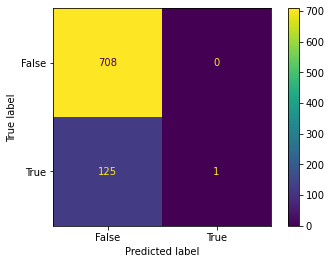

In [37]:
plot_confusion_matrix(gridsearch, X_test, y_test)

## EDA on Important Features